In [1]:
from acemodel import AceModel, Children, simulate_stack
from modelmtds import default_mtd, corr_rand_mtd, bootstrap_mtd
from spew import * 

In [2]:
import brfss
from brfss import bfs_data

In [3]:
brfss.race_list.keys()

dict_keys([0, 1, 2, 3, 4, 5])

In [4]:
brfss.income_list.keys()

dict_keys([0, 1, 2, 3, 4, 5, 9])

sample numbers in SCBRFSS (group by race and income)

In [5]:
scbrfss = bfs_data('./brfss/SCBRFSS.csv')

In [3]:
data_prex = './spew_data/2010_ver1_45079_synth_'
cdl_data = cdn_data(data_prex)
len(cdl_data)

90314

In [27]:
spew_brfss = bfs_data(cdl_data)
for r in list(brfss.race_list.keys())[1:]:
    for i in list(brfss.income_list.keys())[1:]:
        print('race: {} \t income: {}'.format(brfss.race_list[r], brfss.income_list[i]))
        print('\t sample size in brfss: {}'.format(len(scbrfss.get_value(r,i))))
        print('\t sample size in spew:  {}'.format(len(spew_brfss.get_value(r,i))))

race: White 	 income: < 15000
	 sample size in brfss: 2035
	 sample size in spew:  1455
race: White 	 income: 15000 - 24999
	 sample size in brfss: 3861
	 sample size in spew:  1264
race: White 	 income: 25000 - 34999
	 sample size in brfss: 2670
	 sample size in spew:  1903
race: White 	 income: 35000 - 49999
	 sample size in brfss: 3928
	 sample size in spew:  2704
race: White 	 income: 50000 +
	 sample size in brfss: 12229
	 sample size in spew:  28691
race: White 	 income: Don't Know
	 sample size in brfss: 5115
	 sample size in spew:  0
race: Black 	 income: < 15000
	 sample size in brfss: 2197
	 sample size in spew:  8643
race: Black 	 income: 15000 - 24999
	 sample size in brfss: 2682
	 sample size in spew:  5687
race: Black 	 income: 25000 - 34999
	 sample size in brfss: 1282
	 sample size in spew:  6344
race: Black 	 income: 35000 - 49999
	 sample size in brfss: 1268
	 sample size in spew:  8172
race: Black 	 income: 50000 +
	 sample size in brfss: 1978
	 sample size in spew: 

In [53]:
ri_11_array = scbrfss.get_value(1,1,list(brfss.ace_list.values()))[list(brfss.ace_list.values())].to_numpy()

In [80]:
from sklearn.utils import resample
tmp = resample(ri_11_array, n_samples = 10)
(tmp != np.NaN).all(axis = 1)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

float

In [68]:
tmp = np.array([True, False, True])
sum(tmp)

2

In [55]:
ri_11_array.shape

(2035, 12)

In [35]:
tmp = pd.read_csv('./brfss/SCBRFSS.csv', low_memory = False)

In [48]:
tmp[(tmp[['_RACE_G1', '_INCOMG']] == [1,1]).all(axis = 1)][list(brfss.ace_list.values())].notna().all(axis = 1).sum()

418

In [6]:
stack_model = AceModel(cdl_data[
    (cdl_data[['_RACE_G1', '_INCOMG']] == [1,1]).all(axis = 1)
], 1, 1, step_method = default_mtd)

In [7]:
for i in range(100):
    stack_model.step()
    
res = stack_model.datacollector.model_vars['Output'][-1]; res

,id,age,_RACE_G1,_INCOMG,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
0,165829048,8,1,1,0,0,0,0,0,0,1,1,0,0,0,0
1,165829045,2,1,1,0,0,0,0,1,0,0,0,1,0,0,0
2,165829052,8,1,1,0,0,0,0,1,0,0,0,0,0,0,1
3,165829049,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0
4,165829056,8,1,1,0,1,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,150844527,15,1,1,1,1,0,0,1,1,0,1,0,0,0,1
1451,151485100,9,1,1,0,0,1,0,0,1,0,0,0,0,0,1
1452,151485102,4,1,1,0,1,0,0,0,0,0,0,0,0,0,0
1453,151485214,9,1,1,0,1,0,0,0,0,0,0,0,0,1,0


In [8]:
bfs_data(res).get_prop_mat(1,1)['pr']

,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
depress,0.191753,0.063918,0.022680,0.027491,0.055670,0.049485,0.038488,0.069416,0.037801,0.026117,0.017182,0.039175
alcoabuse,0.063918,0.340206,0.032302,0.043986,0.097595,0.079725,0.064605,0.118900,0.064605,0.046048,0.035052,0.067354
drugabuse,0.022680,0.032302,0.101031,0.015120,0.031615,0.030928,0.017869,0.034364,0.021993,0.013058,0.011684,0.015120
prison,0.027491,0.043986,0.015120,0.123024,0.040550,0.030928,0.028179,0.052234,0.023368,0.009622,0.012371,0.019931
patdivorce,0.055670,0.097595,0.031615,0.040550,0.287285,0.078351,0.056357,0.098969,0.059107,0.042612,0.026117,0.053608
phyabuse1,0.049485,0.079725,0.030928,0.030928,0.078351,0.252921,0.061856,0.087285,0.050859,0.032990,0.026804,0.061168
phyabuse2,0.038488,0.064605,0.017869,0.028179,0.056357,0.061856,0.212371,0.063230,0.038488,0.030241,0.019244,0.039175
verbalabuse,0.069416,0.118900,0.034364,0.052234,0.098969,0.087285,0.063230,0.357388,0.067354,0.045361,0.029553,0.068041
sexabuse1,0.037801,0.064605,0.021993,0.023368,0.059107,0.050859,0.038488,0.067354,0.193127,0.028179,0.015808,0.032302
sexabuse2,0.026117,0.046048,0.013058,0.009622,0.042612,0.032990,0.030241,0.045361,0.028179,0.147079,0.015808,0.024742


In [9]:
bfs_data(res).get_corr_mat(1,1)

,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
depress,1.000000,-0.007066,0.027877,0.030170,0.003269,0.005763,-0.013880,0.004694,0.004942,-0.014960,-0.010925,0.009484
alcoabuse,-0.007066,1.000000,-0.014490,0.013705,-0.000661,-0.030689,-0.039455,-0.011827,-0.005872,-0.023772,0.016583,0.002559
drugabuse,0.027877,-0.014490,1.000000,0.027185,0.018996,0.041030,-0.029099,-0.012069,0.020857,-0.016874,0.022084,-0.039567
prison,0.030170,0.013705,0.027185,1.000000,0.035032,-0.001313,0.015274,0.052514,-0.003020,-0.072825,0.005511,-0.032565
patdivorce,0.003269,-0.000661,0.018996,0.035032,1.000000,0.028929,-0.025146,-0.017078,0.020288,0.002234,-0.011434,-0.015913
phyabuse1,0.005763,-0.030689,0.041030,-0.001313,0.028929,1.000000,0.045801,-0.014909,0.011732,-0.027343,0.019254,0.066302
phyabuse2,-0.013880,-0.039455,-0.029099,0.015274,-0.025146,0.045801,1.000000,-0.064637,-0.015650,-0.006867,-0.009870,-0.015807
verbalabuse,0.004694,-0.011827,-0.012069,0.052514,-0.017078,-0.014909,-0.064637,1.000000,-0.008814,-0.042439,-0.034210,-0.011595
sexabuse1,0.004942,-0.005872,0.020857,-0.003020,0.020288,0.011732,-0.015650,-0.008814,1.000000,-0.001618,-0.023839,-0.036076
sexabuse2,-0.014960,-0.023772,-0.016874,-0.072825,0.002234,-0.027343,-0.006867,-0.042439,-0.001618,1.000000,0.015851,-0.029613


In [10]:
corr_model = AceModel(cdl_data[
    (cdl_data[['_RACE_G1', '_INCOMG']] == [1,1]).all(axis = 1)
], 1, 1, step_method = corr_rand_mtd)

In [11]:
for i in range(100):
    corr_model.step()
    
res = corr_model.datacollector.model_vars['Output'][-1]; res

,id,age,_RACE_G1,_INCOMG,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
0,165829048,8,1,1,1,0,0,0,0,0,0,1,0,0,0,0
1,165829045,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,165829052,8,1,1,0,1,1,0,1,0,0,0,0,0,0,0
3,165829049,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
4,165829056,8,1,1,0,0,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,150844527,15,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1451,151485100,9,1,1,0,0,0,1,1,1,0,0,0,0,0,0
1452,151485102,4,1,1,0,0,0,0,0,0,0,1,0,0,0,0
1453,151485214,9,1,1,1,0,0,0,0,0,0,0,0,0,0,0


In [12]:
bfs_data(res).get_prop_mat(1,1)['pr']

,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
depress,0.208935,0.079725,0.017869,0.019244,0.062543,0.035052,0.032990,0.051546,0.019931,0.007560,0.003436,0.018557
alcoabuse,0.079725,0.320962,0.028866,0.026804,0.081100,0.062543,0.039863,0.068729,0.029553,0.007560,0.004124,0.022680
drugabuse,0.017869,0.028866,0.081100,0.008247,0.028179,0.013058,0.012371,0.018557,0.006873,0.000000,0.001375,0.006186
prison,0.019244,0.026804,0.008247,0.073540,0.026804,0.011684,0.014433,0.020619,0.008935,0.002062,0.000000,0.006186
patdivorce,0.062543,0.081100,0.028179,0.026804,0.252921,0.055670,0.043299,0.058419,0.026117,0.009622,0.004124,0.026117
phyabuse1,0.035052,0.062543,0.013058,0.011684,0.055670,0.171821,0.039863,0.050172,0.021306,0.007560,0.003436,0.021306
phyabuse2,0.032990,0.039863,0.012371,0.014433,0.043299,0.039863,0.140893,0.033677,0.015120,0.002062,0.004124,0.013058
verbalabuse,0.051546,0.068729,0.018557,0.020619,0.058419,0.050172,0.033677,0.200000,0.026117,0.007560,0.003436,0.021993
sexabuse1,0.019931,0.029553,0.006873,0.008935,0.026117,0.021306,0.015120,0.026117,0.081100,0.006873,0.004124,0.006186
sexabuse2,0.007560,0.007560,0.000000,0.002062,0.009622,0.007560,0.002062,0.007560,0.006873,0.017869,0.000687,0.003436


In [13]:
bfs_data(res).get_corr_mat(1,1)

,depress,alcoabuse,drugabuse,prison,patdivorce,phyabuse1,phyabuse2,verbalabuse,sexabuse1,sexabuse2,sexabuse3,foodinsecure
depress,1.000000,0.066729,0.008334,0.036554,0.054883,-0.005529,0.025114,0.060014,0.026912,0.071050,0.035933,0.031567
alcoabuse,0.066729,1.000000,0.022253,0.026266,-0.000386,0.041991,-0.032994,0.024291,0.027646,0.029504,0.022720,-0.005789
drugabuse,0.008334,0.022253,1.000000,0.032045,0.064610,-0.008509,0.009947,0.021400,0.003968,-0.040072,0.022299,0.003908
prison,0.036554,0.026266,0.032045,1.000000,0.072310,-0.009667,0.044837,0.056611,0.041691,0.021624,-0.027770,0.012206
patdivorce,0.054883,-0.000386,0.064610,0.072310,1.000000,0.074480,0.050677,0.045062,0.047234,0.088606,0.039830,0.068079
phyabuse1,-0.005529,0.041991,-0.008509,-0.009667,0.074480,1.000000,0.119277,0.104762,0.071580,0.089843,0.048424,0.089641
phyabuse2,0.025114,-0.032994,0.009947,0.044837,0.050677,0.119277,1.000000,0.039509,0.038893,-0.009890,0.081502,0.030900
verbalabuse,0.060014,0.024291,0.021400,0.056611,0.045062,0.104762,0.039509,1.000000,0.090635,0.075226,0.038723,0.071401
sexabuse1,0.026912,0.027646,0.003968,0.041691,0.047234,0.071580,0.038893,0.090635,1.000000,0.149971,0.125461,0.003908
sexabuse2,0.071050,0.029504,-0.040072,0.021624,0.088606,0.089843,-0.009890,0.075226,0.149971,1.000000,0.039850,0.061998


In [ ]:
# default_result = simulate_stack(mtd = default_mtd, display = False)

In [ ]:
# corr_result = simulate_stack(mtd = corr_rand_mtd, display = False)

In [5]:
bst_result = simulate_stack(mtd = bootstrap_mtd, step_num = 1)

number of samples which don't have NaN values

In [8]:
for r in list(brfss.race_list.keys())[1:]:
    for i in list(brfss.income_list.keys())[1:]:
        print('race: {} \t income: {}'.format(brfss.race_list[r], brfss.income_list[i]))
        print('\t sample size in brfss: {}'.format(len(scbrfss.get_value(r,i))))
        ri_values = scbrfss.get_value(r, i, list(brfss.ace_list.values())).to_numpy()[:, 2:]
        v_count = np.isnan(ri_values).sum(axis = 1)
        hist_c,bins_c = np.histogram(v_count, bins = np.arange(14), density = False)
        hist,bins = np.histogram(v_count, bins = np.arange(14), density = True)
        for c in range(13):
            print('\t{:>2}: \t {:>6d} \t {:.6f} \t {:.6f}'.format(c, hist_c[c], hist[c], np.cumsum(hist)[c]))
        print('')

race: White 	 income: < 15000
	 sample size in brfss: 2035
	 0: 	    372 	 0.182801 	 0.182801
	 1: 	    918 	 0.451106 	 0.633907
	 2: 	     77 	 0.037838 	 0.671744
	 3: 	     18 	 0.008845 	 0.680590
	 4: 	     10 	 0.004914 	 0.685504
	 5: 	      3 	 0.001474 	 0.686978
	 6: 	      2 	 0.000983 	 0.687961
	 7: 	      0 	 0.000000 	 0.687961
	 8: 	      2 	 0.000983 	 0.688943
	 9: 	      2 	 0.000983 	 0.689926
	10: 	      0 	 0.000000 	 0.689926
	11: 	    367 	 0.180344 	 0.870270
	12: 	    264 	 0.129730 	 1.000000

race: White 	 income: 15000 - 24999
	 sample size in brfss: 3861
	 0: 	    753 	 0.195027 	 0.195027
	 1: 	   1737 	 0.449883 	 0.644911
	 2: 	     78 	 0.020202 	 0.665113
	 3: 	     29 	 0.007511 	 0.672624
	 4: 	     17 	 0.004403 	 0.677027
	 5: 	      3 	 0.000777 	 0.677804
	 6: 	      5 	 0.001295 	 0.679099
	 7: 	      1 	 0.000259 	 0.679358
	 8: 	      1 	 0.000259 	 0.679617
	 9: 	      1 	 0.000259 	 0.679876
	10: 	      0 	 0.000000 	 0.679876
	11: 	    8

In [55]:
ri_values = scbrfss.get_value(1,1, list(brfss.ace_list.values())).to_numpy()[:, 2:]

In [56]:
ri_values[(np.isnan(ri_values)).all(axis = 1)].shape

(264, 12)

In [57]:
v_count = np.isnan(ri_values).sum(axis = 1)

In [58]:
np.unique(v_count)

array([ 0,  1,  2,  3,  4,  5,  6,  8,  9, 11, 12])

In [77]:
hist,bins = np.histogram(v_count, bins = np.arange(14), density = True)

In [78]:
hist, bins

(array([0.18280098, 0.45110565, 0.03783784, 0.00884521, 0.004914  ,
        0.0014742 , 0.0009828 , 0.        , 0.0009828 , 0.0009828 ,
        0.        , 0.18034398, 0.12972973]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]))

In [79]:
np.cumsum(hist)

array([0.18280098, 0.63390663, 0.67174447, 0.68058968, 0.68550369,
       0.68697789, 0.68796069, 0.68796069, 0.68894349, 0.68992629,
       0.68992629, 0.87027027, 1.        ])

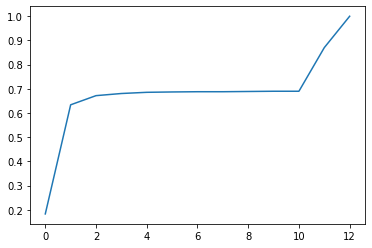

In [81]:
from matplotlib import pyplot as plt
plt.plot(np.arange(13), np.cumsum(hist))